# Podatki vsebujejo vnose

In [3]:
from data_loader.load import load_pd
import numpy as np
import pandas as pd

import os
os.environ["PYTHONIOENCODING"] = "utf-8"
np.random.seed(42)

%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.pyplot as plt


data: pd.DataFrame = load_pd()
# print(data[:,0] not in np.unique(data[:,0]))
# print(data[:,0] not in np.unique(data[:,0]))
# data[~np.in1d(data[:,0], np.unique(data[:,0]))]


## V podatkih nastopajo različni tipi oseb:

/Users/filipjeretina/Library/Python/3.8/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
/Users/filipjeretina/Library/Python/3.8/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


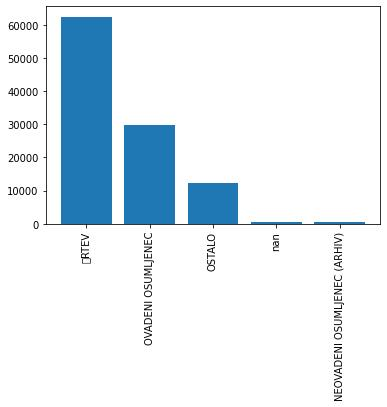

In [2]:
plt.figure();
count_per_type_of_person = data["VrstaOsebe"].value_counts(dropna=False)
plt.bar(range(len(count_per_type_of_person)), count_per_type_of_person.values);
plt.xticks(range(len(count_per_type_of_person)), count_per_type_of_person.index.values, rotation="90");


## V podatkih nastopajo različni tipi vnosov:

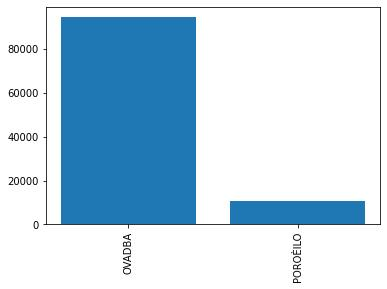

In [3]:
count_per_entry_types = data["VrstaZakljucnegaDokumenta"].value_counts(dropna=False)
plt.figure()
plt.bar(range(len(count_per_entry_types)), count_per_entry_types.values);
plt.xticks(range(len(count_per_entry_types)), count_per_entry_types.index.values, rotation="90");

#### Mark Loboda je ugotovil, da je zelo veliko "NN" vnosov za alkohol in substance
Predvidevam, da imajo večinoma žrtve NN...

In [4]:
victims = data.where(data["VrstaOsebe"] == "OSTALO").dropna(how="all")

In [5]:
victims

,ZaporednaStevilkaKD,MesecStoritve,UraStoritve,DanVTednu,PUStoritveKD,Povratnik,OpisKD,PoglavjeKD,GospodarskiKriminal,OrganiziranKriminal,...,ZaporednaStevilkaOsebeVKD,VrstaOsebe,StarostniRazred,Spol,Drzavljanstvo,Poskodba,VplivAlkohola,VplivMamil,OrganiziranaZdruzba,Skoda
4,4.0,2.2011,09:00-09:59,SREDA,GPU,NE,KZ08/204-/1/S/ - TATVINA,KD ZOPER PREMOENJE,SPLONA,,...,4002.0,OSTALO,34-44,MOKI,TUJE,NaN,NE,NE,NE,BREZ
5,5.0,12.2008,23:00-23:59,SREDA,PU CELJE,DA,KZ08/240-/2// - ZLORABA POLOAJA ALI ZAUPANJA ...,KD ZOPER GOSPODARSTVO,GOSPODARSKA,,...,5001.0,OSTALO,34-44,MOKI,SLOVENSKO,NaN,NE,NE,NE,BREZ
6,5.0,12.2008,23:00-23:59,SREDA,PU CELJE,DA,KZ08/240-/2// - ZLORABA POLOAJA ALI ZAUPANJA ...,KD ZOPER GOSPODARSTVO,GOSPODARSKA,,...,5002.0,OSTALO,34-44,MOKI,SLOVENSKO,NaN,NE,NE,NE,BREZ
11,5.0,12.2008,23:00-23:59,SREDA,PU CELJE,DA,KZ08/240-/2// - ZLORABA POLOAJA ALI ZAUPANJA ...,KD ZOPER GOSPODARSTVO,GOSPODARSKA,,...,5007.0,OSTALO,24-34,MOKI,SLOVENSKO,NaN,NE,NE,NE,BREZ
12,5.0,12.2008,23:00-23:59,SREDA,PU CELJE,DA,KZ08/240-/2// - ZLORABA POLOAJA ALI ZAUPANJA ...,KD ZOPER GOSPODARSTVO,GOSPODARSKA,,...,5008.0,OSTALO,34-44,MOKI,SLOVENSKO,NaN,NE,NE,NE,BREZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105302,61174.0,10.2019,06:00-06:59,SREDA,PU KOPER,NE,KZ12/296*/1// - NASILNITVO,KD ZOPER JAVNI RED IN MIR,SPLONA,,...,61174001.0,OSTALO,54-64,MOKI,SLOVENSKO,NaN,NE,NE,NE,BREZ
105307,61176.0,12.2019,15:00-15:59,PONEDELJEK,PU LJUBLJANA,NE,KZ12/204*/2/S/ - TATVINA,KD ZOPER PREMOENJE,SPLONA,,...,61176002.0,OSTALO,54-64,MOKI,SLOVENSKO,NaN,NE,NE,NE,BREZ
105309,61177.0,12.2019,15:00-15:59,ÈETRTEK,PU CELJE,NE,KZ12/220*/1// - POKODOVANJE TUJE STVARI,KD ZOPER PREMOENJE,SPLONA,,...,61177002.0,OSTALO,34-44,MOKI,SLOVENSKO,NaN,NE,NE,NE,BREZ
105320,61184.0,12.2019,13:00-13:59,TOREK,PU LJUBLJANA,NE,KZ12/204*/2/S/ - TATVINA,KD ZOPER PREMOENJE,SPLONA,,...,61184002.0,OSTALO,18-24,MOKI,TUJE,NaN,NE,NE,NE,BREZ


## Kraji kaznivih dejanj (Policijske enote)

42433
[nan '\x8eRTEV' 'OSTALO' 'OVADENI OSUMLJENEC'
 'NEOVADENI OSUMLJENEC (ARHIV)']


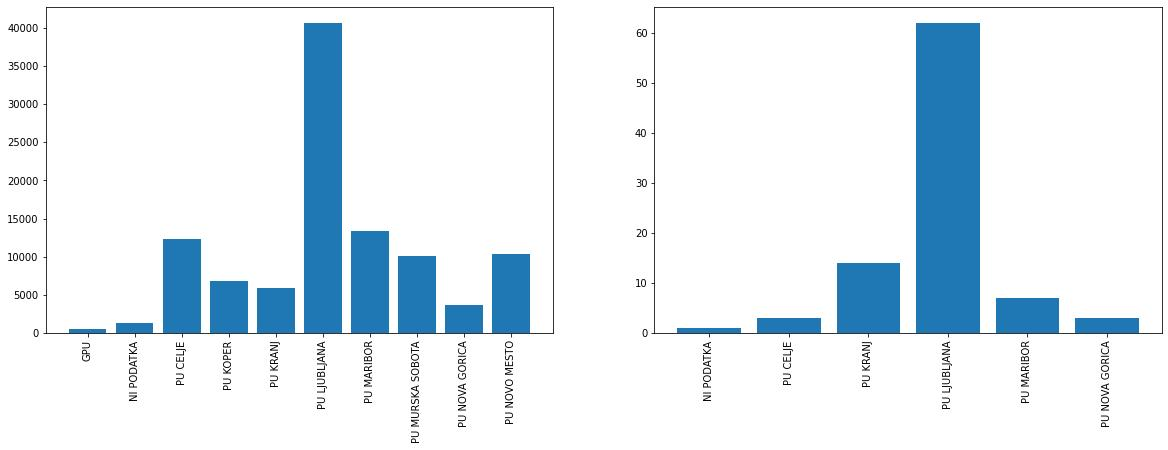

In [16]:
count_per_pu_all = data.groupby("PUStoritveKD").count()
count_per_pu_assailants = data.where(data.VrstaOsebe != "Žrtev").dropna().groupby("PUStoritveKD").count()
print(data.where(data["VrstaOsebe"] != data.VrstaOsebe.unique()[1]).VrstaOsebe.dropna().__len__())
print(data.VrstaOsebe.unique())

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].bar(range(len(count_per_pu_all.values[:,0])), count_per_pu_all.values[:,0]);
ax[0].set_xticks(range(len(count_per_pu_all.values[:,0])), count_per_pu_all.index.values, rotation="90");

ax[1].bar(range(len(count_per_pu_assailants.values[:,0])), count_per_pu_assailants.values[:,0]);
ax[1].set_xticks(range(len(count_per_pu_assailants.values[:,0])), count_per_pu_assailants.index.values, rotation="90");


In [18]:
print(data.OpisKraja.unique() ,len(data.OpisKraja.unique()))

['NARAVNA POVR\x8aINA'
 'NASTANITVENI PROSTOR Z NEPOSREDNO OKOLICO (DVORI\x8aÈE, VRT IPD.)'
 'OBMOÈJE PROMETA' 'OSTALO'
 'PROSTOR DR\x8e. USTANOVE, ORGANA LOKALNE SKUP., POLIT. ALI INTERES. ORG.'
 'UPRAVNO-ADMINISTRATIVNI PROSTOR PODJETJA ALI DRUGE ORGANIZACIJE'
 'PROSTOR ZA INDUSTRIJSKO, KMETIJSKO ALI OBRTNO PROIZVODNJO IN STORITVE'
 'PROSTOR ZA DENARNO-FINANÈNE STORITVE'
 'PROSTOR ZA ZDRAVSTVENE STORITVE Z NEPOSRED. OKOLICO (DVORI\x8aÈE IPD.)'
 'PRODAJNI PROSTOR'
 'PROST. ZA VZGOJNOVAR. IN IZOBR. DEJ. Z NEPOS. OKOL.(DVORI\x8aÈE,\x8aOL.IGR.)'
 'PROSTOR ZA \x8aPORT, REKREACIJO, ZABAVO' 'PROSTOR DRUGIH USTANOV'
 'PROSTOR ZA VERSKE OBREDE' 'ODPRT ALI ZAPRT SKLADI\x8aÈNI PROSTOR'
 'URADNI PROSTORI POLICIJE' 'VOZILA' 'GRADBI\x8aÈE'
 'PROSTOR ZA KULTURNO DEJAVNOST' nan 'POSEBEJ (ZA)VAROVANO OBMOÈJE'
 'KOMUNALNI PROSTOR'] 22


        ZaporednaStevilkaKD  MesecStoritve UraStoritve DanVTednu PUStoritveKD  \
0                       NaN            NaN         NaN       NaN          NaN   
1                       NaN            NaN         NaN       NaN          NaN   
2                       NaN            NaN         NaN       NaN          NaN   
3                       NaN            NaN         NaN       NaN          NaN   
4                       NaN            NaN         NaN       NaN          NaN   
...                     ...            ...         ...       ...          ...   
105340                  NaN            NaN         NaN       NaN          NaN   
105341                  NaN            NaN         NaN       NaN          NaN   
105342                  NaN            NaN         NaN       NaN          NaN   
105343                  NaN            NaN         NaN       NaN          NaN   
105344                  NaN            NaN         NaN       NaN          NaN   

       Povratnik OpisKD Pog